In [2]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score
import pandas as pd
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [6]:
df_filtrado = pd.read_csv('data/training_data.csv')

In [7]:
df_filtrado

,Unnamed: 0,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode,Quantity_log,price_total_log,Recencia,Frecuencia,Monto,FirstPurchaseMonth
0,0,536365,2010-12-01,17850,40,139.12,7,3.688879,4.935337,71,35,5493.79,2010-12
1,1,536366,2010-12-01,17850,12,22.20,2,2.484907,3.100092,71,35,5493.79,2010-12
2,2,536367,2010-12-01,13047,83,278.73,12,4.418841,5.630244,342,18,3395.98,2010-12
3,3,536368,2010-12-01,13047,15,70.05,4,2.708050,4.249209,342,18,3395.98,2010-12
4,4,536369,2010-12-01,13047,3,17.85,1,1.098612,2.882004,342,18,3395.98,2010-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19433,19433,581470,2011-12-08,17924,4,8.32,1,1.386294,2.118662,0,12,1456.15,2010-12
19434,19434,581490,2011-12-09,14397,23,32.53,2,3.135494,3.482163,0,23,2669.24,2011-05
19435,19435,581499,2011-12-09,15498,1,224.69,1,0.000000,5.414722,0,31,9175.29,2010-12
19436,19436,581568,2011-12-09,15311,5,54.75,1,1.609438,4.002777,0,88,23054.30,2010-12


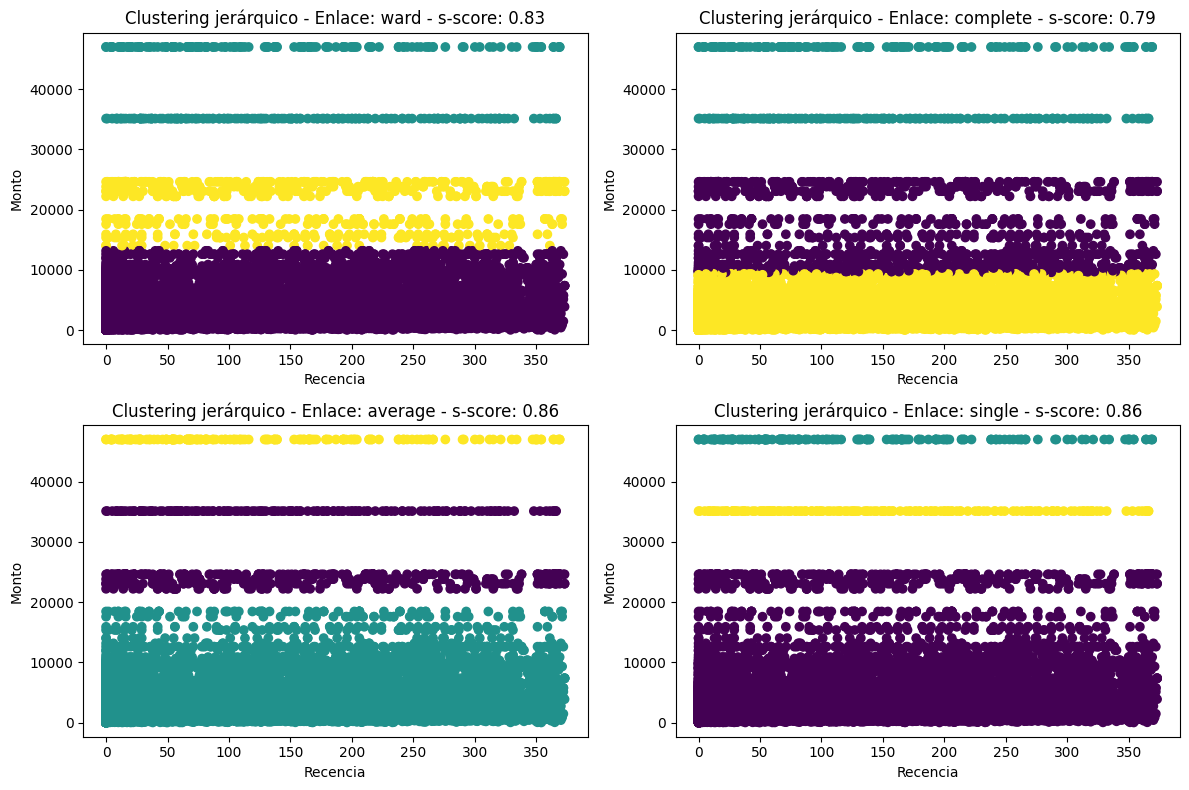

In [8]:
# Seleccionar las columnas relevantes para el clustering jerárquico
X = df_filtrado[['Recencia', 'Monto', 'Frecuencia']]

# Crear lista de métodos de enlace
linkage_methods = ['ward', 'complete', 'average', 'single']

# Configurar la visualización
plt.figure(figsize=(12, 8))

# Iterar sobre los métodos de enlace y realizar clustering jerárquico
for i, method in enumerate(linkage_methods):
    # Realizar clustering jerárquico con el método de enlace actual
    clustering = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels = clustering.fit_predict(X)
    sc = silhouette_score(X, labels)

    # Graficar los puntos en un diagrama de dispersión para las dos primeras columnas
    plt.subplot(2, 2, i+1)
    plt.scatter(X['Recencia'], X['Monto'], c=labels, cmap='viridis')
    plt.xlabel('Recencia')
    plt.ylabel('Monto')
    plt.title(f'Clustering jerárquico - Enlace: {method} - s-score: {sc:.2f}')

plt.tight_layout()
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, QuantileTransformer

# Estandarizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filtrado[['Recencia', 'Frecuencia', 'Monto']])

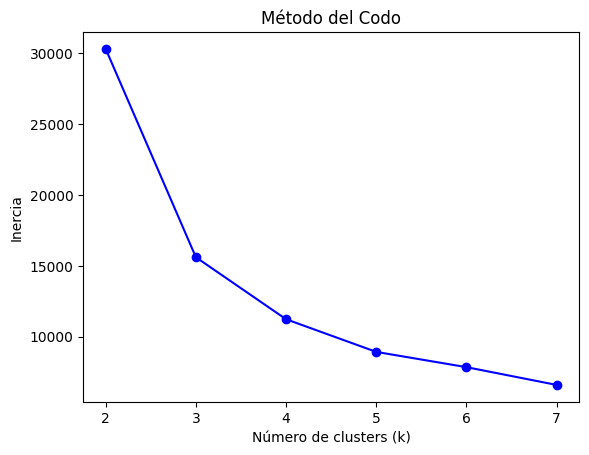

In [10]:


# Definir una lista de posibles valores de k para el método del codo
k_values = range(2, 8)

# Inicializar listas para almacenar las métricas
inertia_values = []

# Realizar clustering con diferentes valores de k y calcular las métricas
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    # Calcular la inercia
    inertia_values.append(kmeans.inertia_)

# Graficar el método del codo utilizando la inercia
plt.plot(k_values, inertia_values, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')

plt.show()

['Cluster 1', 'Cluster 2', 'Cluster 0']


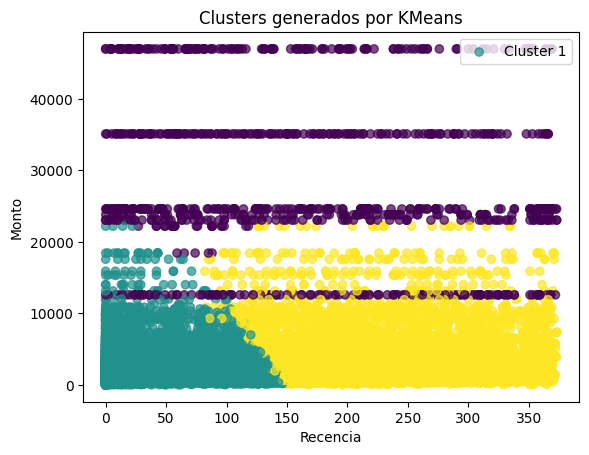

In [11]:
# Aplicar algoritmos de clustering (por ejemplo, KMeans)
kmeans = KMeans(n_clusters=3, random_state=42)
df_filtrado['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualizar los resultados
plt.scatter(df_filtrado['Recencia'], df_filtrado['Monto'], c=df_filtrado['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Recencia')
plt.ylabel('Monto')
plt.title('Clusters generados por KMeans')

# Obtener etiquetas únicas de los clusters
unique_labels = df_filtrado['Cluster'].unique()

# Generar etiquetas para la leyenda
legend_labels = [f'Cluster {label}' for label in unique_labels]
print(legend_labels)
# Agregar leyenda
plt.legend(legend_labels, loc='upper right')
plt.show()


In [12]:

pca = PCA(n_components=2)  # Crear el modelo PCA
df_pca = pca.fit_transform(df_scaled)  # Transformar los datos

# Opcional: Para acceder a la varianza explicada
explained_variance = pca.explained_variance_ratio_


In [13]:
explained_variance

array([0.65857427, 0.30665585])

In [14]:
df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2"])


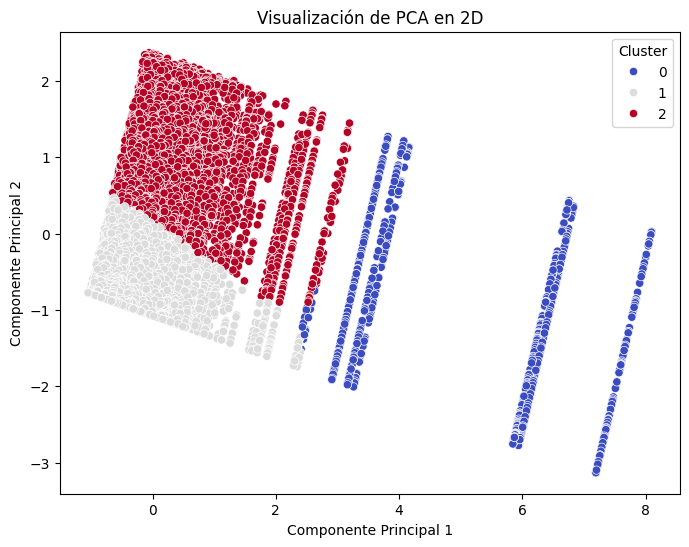

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un scatter plot de las dos primeras componentes principales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca.iloc[:, 0], y=df_pca.iloc[:, 1], hue=df_filtrado['Cluster'], palette="coolwarm")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Visualización de PCA en 2D")
plt.show()



In [16]:
score = silhouette_score(df_pca, df_filtrado['Cluster'])
print("Silhouette Score:", score)

Silhouette Score: 0.5524285700261868


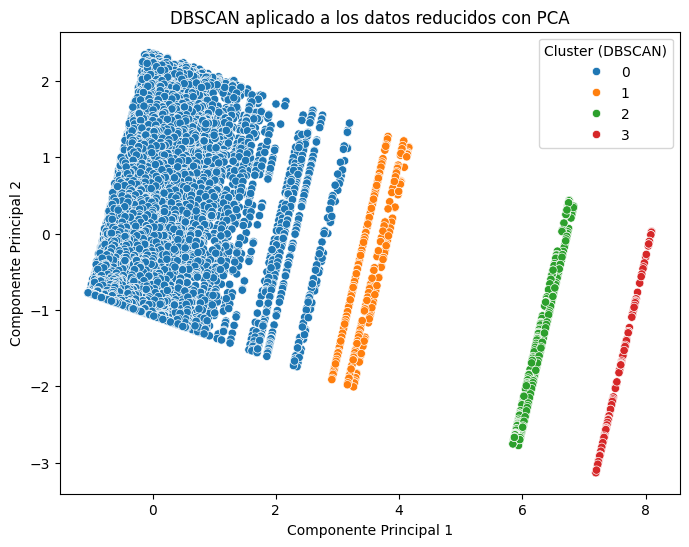

In [17]:

# Crear el modelo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajusta eps y min_samples según sea necesario
df_filtrado["Cluster_DBSCAN"] = dbscan.fit_predict(df_pca)

# Visualizar los resultados
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca.iloc[:, 0], y=df_pca.iloc[:, 1], hue=df_filtrado["Cluster_DBSCAN"], palette="tab10", legend="full")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("DBSCAN aplicado a los datos reducidos con PCA")
plt.legend(title="Cluster (DBSCAN)")
plt.show()


In [18]:
score = silhouette_score(df_pca, df_filtrado['Cluster_DBSCAN'])
print("Silhouette Score:", score)

Silhouette Score: 0.6319576825011058


In [20]:


# Definir rangos para eps y min_samples
eps_range = np.arange(0.1, 1.0, 0.1)  # Valores de eps
min_samples_range = range(3, 11)      # Valores de min_samples

# Variables para almacenar los mejores parámetros
best_score = -1
best_params = {"eps": None, "min_samples": None}

# GridSearch manual
for eps in eps_range:
    for min_samples in min_samples_range:
        # Aplicar DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_pca)
        
        # Ignorar configuraciones con un único clúster o todos ruido
        if len(set(labels)) <= 1 or (labels == -1).mean() == 1.0:
            continue
        
        # Calcular Silhouette Score
        score = silhouette_score(df_pca, labels)
        
        # Guardar si es el mejor hasta ahora
        if score > best_score:
            best_score = score
            best_params = {"eps": eps, "min_samples": min_samples}

# Resultados
print("Mejor Silhouette Score:", best_score)
print("Mejores parámetros:", best_params)

Mejor Silhouette Score: 0.7597272932510796
Mejores parámetros: {'eps': np.float64(0.6), 'min_samples': 3}


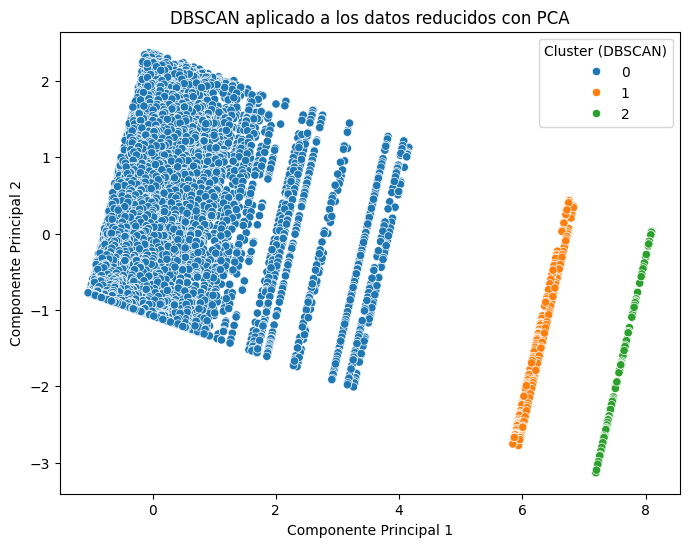

In [21]:

# Crear el modelo DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=3)  # Ajusta eps y min_samples según sea necesario
df_filtrado["Cluster_DBSCAN_BEST_PARAMS"] = dbscan.fit_predict(df_pca)

# Visualizar los resultados
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca.iloc[:, 0], y=df_pca.iloc[:, 1], hue=df_filtrado["Cluster_DBSCAN_BEST_PARAMS"], palette="tab10", legend="full")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("DBSCAN aplicado a los datos reducidos con PCA")
plt.legend(title="Cluster (DBSCAN)")
plt.show()


In [23]:

df_filtrado['CLUSTER_BEST_INT'] = df_filtrado['Cluster_DBSCAN_BEST_PARAMS'].astype(int)
# Identificar columnas categóricas
categorical_cols = df_filtrado.select_dtypes(include=['category', 'object']).columns

# Excluir columnas categóricas antes de calcular el promedio
numerical_cols = df_filtrado.drop(columns=categorical_cols).columns

# Agrupación por "CLUSTER_BEST_INT" y cálculo de la media
cluster_summary = df_filtrado[numerical_cols].groupby(df_filtrado["CLUSTER_BEST_INT"]).mean()
cluster_summary


,Unnamed: 0,InvoiceNo,CustomerID,Quantity,price_total,StockCode,Quantity_log,price_total_log,Recencia,Frecuencia,Monto,Cluster,Cluster_DBSCAN,Cluster_DBSCAN_BEST_PARAMS,CLUSTER_BEST_INT
CLUSTER_BEST_INT,,,,,,,,,,,,,,,
0,9716.010790,559162.498836,15271.378345,128.473818,234.133310,15.415318,4.062559,4.889270,114.954829,13.632180,3043.683836,1.361525,0.016132,0.0,0.0
1,9254.213514,558857.478378,14964.143243,96.110811,161.406135,29.394595,3.498514,4.198548,164.702703,188.113514,29179.325703,0.000000,2.000000,1.0,1.0
2,11069.407407,561478.259259,14911.000000,132.722222,290.079012,13.148148,3.870330,4.948420,138.716049,162.000000,46992.800000,0.000000,3.000000,2.0,2.0
